# Data Classification

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

# Data Prep

In [380]:
df = pd.read_csv('C:\\Users\\Britn\\Downloads\\archive\\SalaryData.csv')
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Education'] = df['Education'].replace({"Bachelor's": 1, "Master's": 2, 'PhD': 3})
X = normalize(df.drop(columns=['Salary', 'JobTitle']))
Y = df['Salary']
Y = Y.values


C:\Users\Britn\AppData\Local\Temp\ipykernel_42476\3890299014.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
C:\Users\Britn\AppData\Local\Temp\ipykernel_42476\3890299014.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({"Bachelor's": 1, "Master's": 2, 'PhD': 3})


### Data Visualization

<Figure size 1000x1500 with 0 Axes>

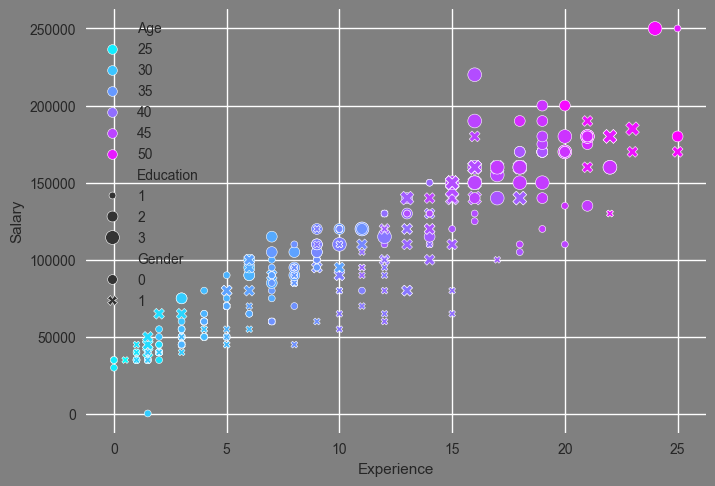

In [415]:

plt.figure(figsize = (10, 15))
plt.figure(facecolor= 'Grey')
plt.axes().set_facecolor('Grey')
sns.scatterplot(data = df, x = 'Experience', y = 'Salary', hue = 'Age', style = 'Gender', size = 'Education', palette='cool')
plt.show()

### Splitting Training and Testing Data

In [365]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1, random_state = 1)


### Data Scaling

In [366]:
scale_X = MinMaxScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.fit_transform(X_test)


# Model Implementation

#### Training the Data

In [367]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

#### Testing the data

In [368]:
knn_model.predict(X_test)

array([ 50000, 180000, 170000, 160000,  85000, 150000,  90000, 160000,
        50000,  85000, 160000,  85000,  95000,  80000,  35000, 130000,
       180000,  50000, 105000,  90000,  40000,  95000, 120000, 160000,
       170000,  35000,  60000, 105000, 160000, 170000, 160000, 130000,
        85000, 105000, 160000, 170000,  60000, 170000], dtype=int64)

#### Accuracy

In [421]:
acc = round((knn_model.score(X_test, Y_test) * 100), 2)
print(f'Accuracy : {acc} %')


Accuracy : 47.37 %
